# Car price prediction


## 1. Librairies import

In [47]:
# Data Wrangling 
import pandas as pd 
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.tools.tools import add_constant
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor


## 2. Data import

In [48]:
df=pd.read_csv(r"C:\Users\andre\Documents\Projet python\car_price\car_price_prediction.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [50]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## 3. Data exploration

### 3.1 Missing Data & replace columns

In [51]:
category=['Manufacturer','Model','Category','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color','Turbo','Doors']
conti=['Levy','Mileage','Price','Prod. year','Engine volume','Cylinders']

In [52]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [53]:
df['Levy'].head(50)

0     1399
1     1018
2        -
3      862
4      446
5      891
6      761
7      751
8      394
9        -
10    1053
11       -
12       -
13    1055
14     891
15    1079
16     810
17     810
18    2386
19    1850
20     531
21     586
22    1249
23       -
24       -
25       -
26    2455
27       -
28     583
29    1537
30    1288
31     915
32       -
33    1750
34       -
35     707
36    1077
37    1486
38     531
39    1399
40     751
41    1091
42     650
43     382
44    1436
45    1194
46     503
47    1017
48       -
49       -
Name: Levy, dtype: object

In [54]:
(df['Levy']=="-").sum()

5819

In [55]:
median=df['Levy']
df['Levy'] = df['Levy'].replace('-', np.nan)

imp = SimpleImputer(missing_values=np.nan, strategy='median')
impute_data = df['Levy'].values.reshape(-1, 1)
imp.fit(impute_data)
df['Levy'] = imp.transform(impute_data)
df['Levy']=df['Levy'].astype('int')

In [56]:
print(df['Manufacturer'].value_counts())
print(df['Model'].value_counts())
print(df['Category'].value_counts())
print(df['Leather interior'].value_counts())
print(df['Gear box type'].value_counts())
print(df['Drive wheels'].value_counts())
print(df['Doors'].value_counts())
print(df['Wheel'].value_counts())
print(df['Color'].value_counts())
print(df['Airbags'].value_counts())
print(df['Cylinders'].value_counts())
print(df['Engine volume'].value_counts())


HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64
Yes    13954
No      5283
Name: Leather interior, dtype: int64
Automatic    13514
Tiptronic   

In [57]:
df['Doors']=df['Doors'].str.replace('04-May','4 doors').str.replace('02-Mar','2 doors').str.replace('>5','+5 doors')

In [58]:
df['Engine volume'].head(60)

0           3.5
1             3
2           1.3
3           2.5
4           1.3
5             2
6           1.8
7           2.4
8           2.5
9           3.5
10          3.5
11            4
12          1.6
13          3.5
14            2
15            2
16          1.8
17          1.8
18          3.3
19          3.5
20          1.6
21          1.8
22          2.5
23    2.0 Turbo
24          1.8
25    2.2 Turbo
26          4.7
27          1.5
28          1.6
29          3.3
30    2.0 Turbo
31            3
32          4.4
33          3.3
34    3.0 Turbo
35            2
36            2
37          1.3
38          1.6
39          3.5
40          2.4
41          2.5
42    1.4 Turbo
43          2.4
44          3.6
45            4
46          1.5
47            2
48          1.5
49          2.3
50            2
51            3
52    1.5 Turbo
53            2
54            2
55            2
56    2.0 Turbo
57          1.6
58            3
59    1.4 Turbo
Name: Engine volume, dtype: object

In [59]:
df['Turbo']="No Turbo"
df.loc[df['Engine volume'].str.contains('Turbo', case=False), 'Turbo'] = "Turbo"

In [60]:
df['Engine volume']=df['Engine volume'].str.replace("Turbo","").astype('float')

In [61]:
df['Mileage'].head(60)

0     186005 km
1     192000 km
2     200000 km
3     168966 km
4      91901 km
5     160931 km
6     258909 km
7     216118 km
8     398069 km
9     128500 km
10    184467 km
11         0 km
12    350000 km
13    138038 km
14     76000 km
15     74146 km
16    121840 km
17     54317 km
18    295059 km
19    364523 km
20    112645 km
21    187000 km
22     39709 km
23    230000 km
24         0 km
25    210000 km
26         0 km
27    169000 km
28    158787 km
29    420550 km
30    180000 km
31    175056 km
32    200000 km
33    287274 km
34    250000 km
35    162000 km
36     10200 km
37    158000 km
38    103490 km
39    382746 km
40    203200 km
41     61057 km
42     11200 km
43    141000 km
44    160259 km
45    239342 km
46    128000 km
47    100734 km
48    141500 km
49    147000 km
50     87768 km
51    264014 km
52    132542 km
53      1600 km
54     87000 km
55    260000 km
56      5323 km
57     87112 km
58    204318 km
59     22000 km
Name: Mileage, dtype: object

In [62]:
df['Mileage']=df["Mileage"].str.replace("km","").astype("int")

In [63]:
df['Price'].head(60)

0     13328
1     16621
2      8467
3      3607
4     11726
5     39493
6      1803
7       549
8      1098
9     26657
10      941
11     8781
12     3000
13     1019
14    59464
15      549
16     7683
17    28382
18      549
19      941
20    18826
21    20698
22    17562
23     7840
24     4704
25    20385
26      549
27       30
28    14454
29    12074
30    15681
31    19444
32     6899
33      125
34    24462
35    23235
36    51746
37     7527
38    19121
39      314
40    24462
41    45734
42    20165
43    21326
44      549
45      220
46    15681
47    55390
48    12544
49    17249
50    34889
51      862
52    14583
53      392
54    38500
55     8781
56    87112
57     1411
58      392
59    23521
Name: Price, dtype: int64

### 4.2 Category variable

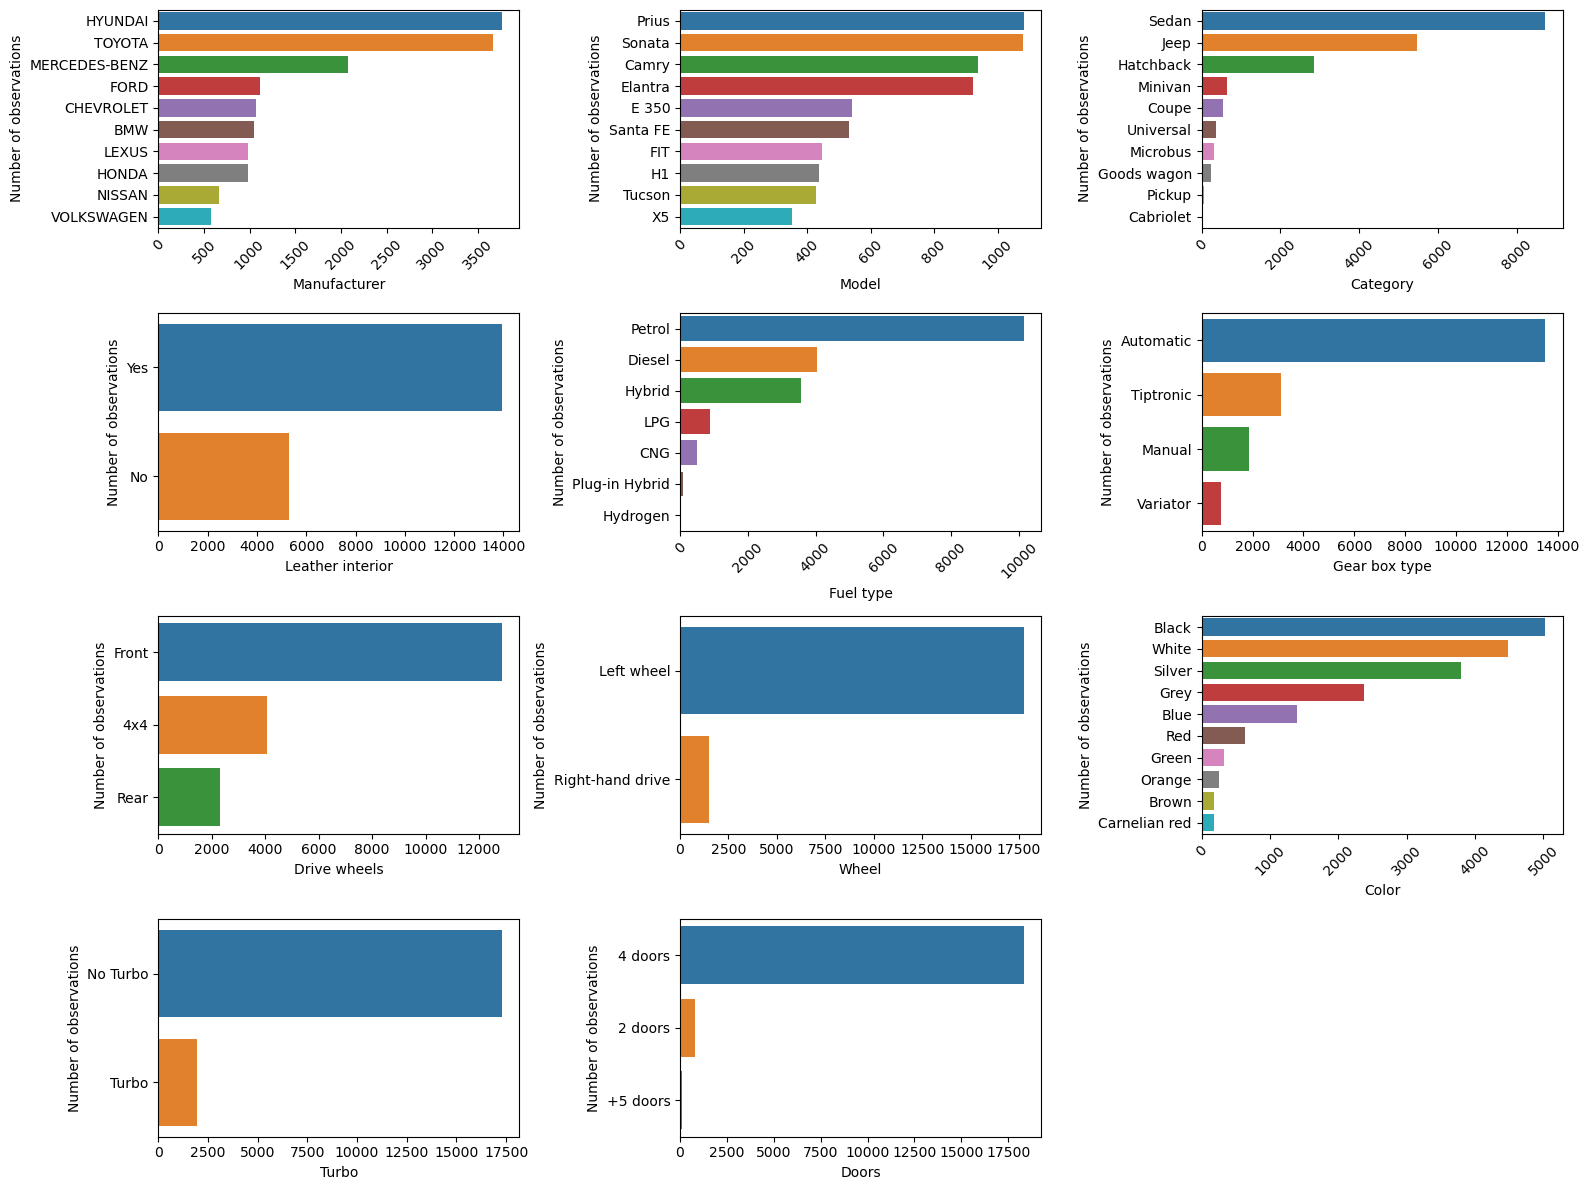

In [64]:
fig = plt.figure(figsize=(16, 12))

for i, cat in enumerate(category):
    plt.subplot(4, 3, i+1)  
    if len(df[cat].value_counts()) > 10:
        top = df[cat].value_counts().nlargest(10).index  
        sns.countplot(y=cat, data=df, order=top, orient='h')
    else:
        sns.countplot(y=cat, data=df, order= df[cat].value_counts().index)

    if len(df[cat].value_counts()) > 5:
        plt.xticks(rotation=45)
    plt.xlabel(cat)
    plt.ylabel("Number of observations")

plt.tight_layout()  
plt.show()


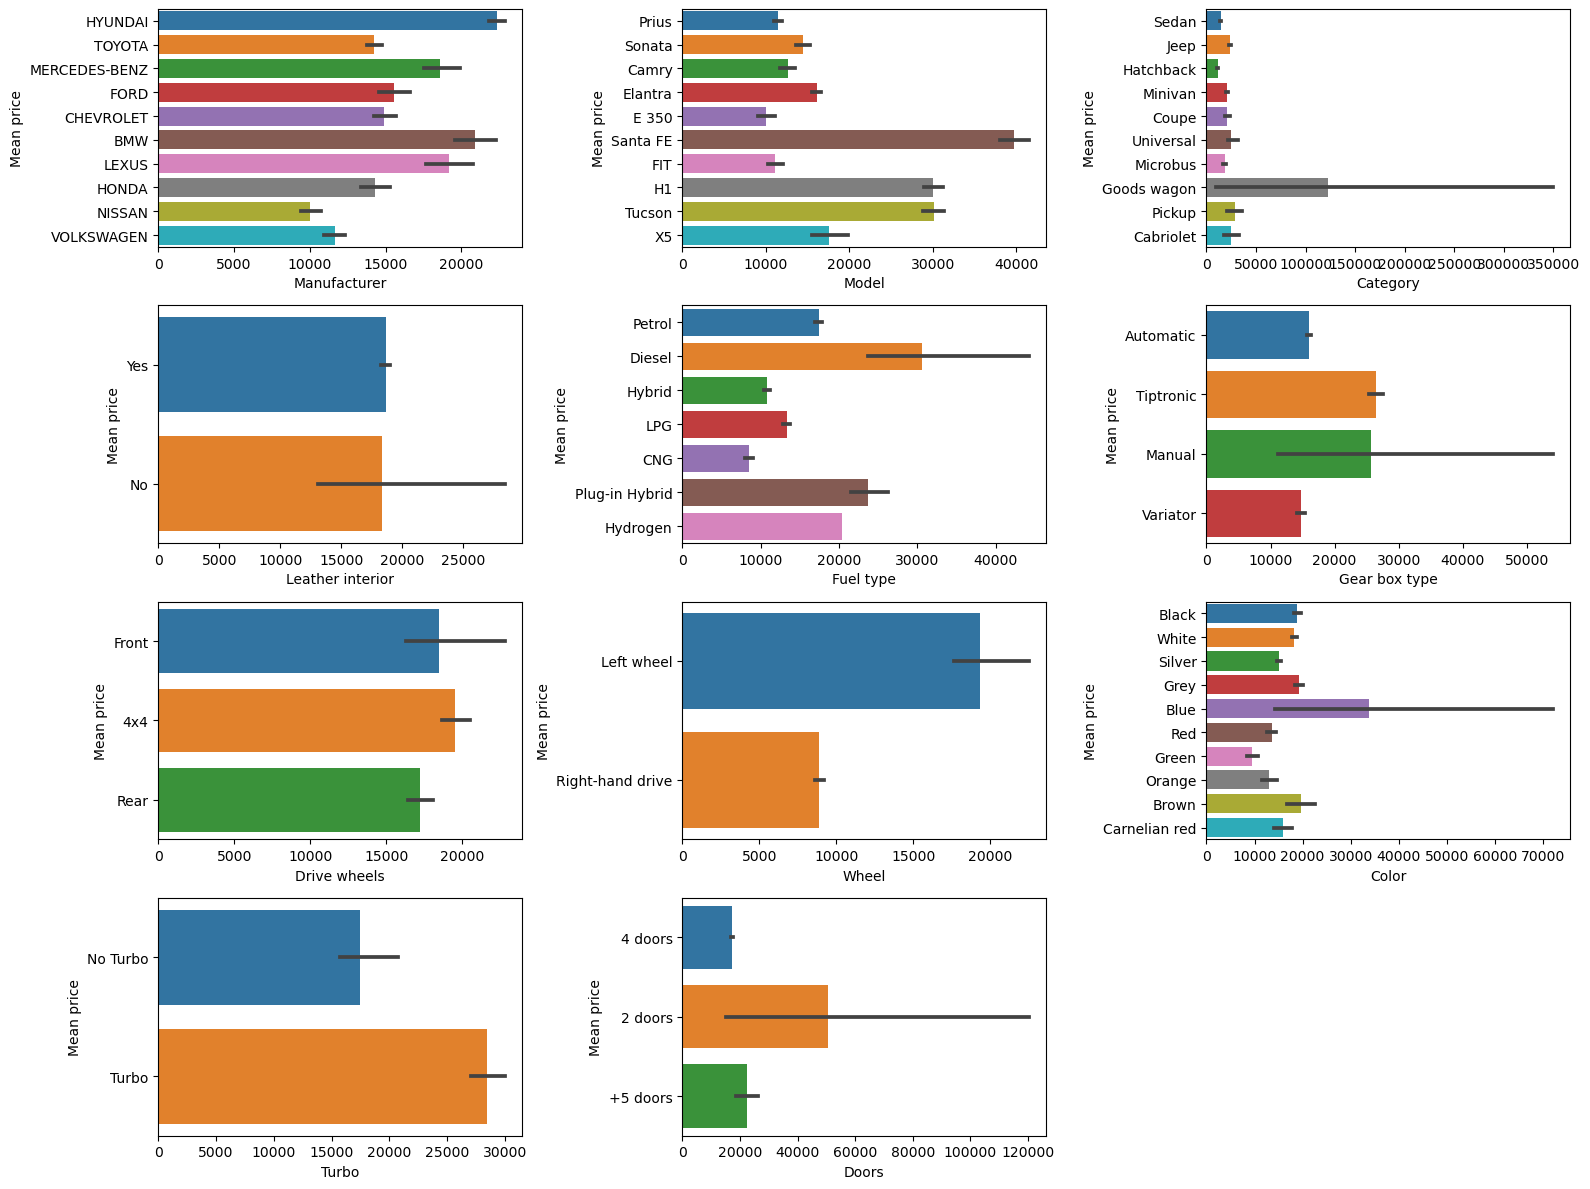

In [65]:
fig = plt.figure(figsize=(16, 12))

for i, cat in enumerate(category):
    plt.subplot(4, 3, i+1)  
    if len(df[cat].value_counts()) > 10:
        top = df[cat].value_counts().nlargest(10).index  
        sns.barplot(y=cat,x='Price', data=df, order=top,orient='h')
    else:
        sns.barplot(y=cat,x='Price', data=df, orient='h', order= df[cat].value_counts().index)
    plt.xlabel(cat)
    plt.ylabel("Mean price")

plt.tight_layout()  
plt.show()


### 4.3 Continuous variable

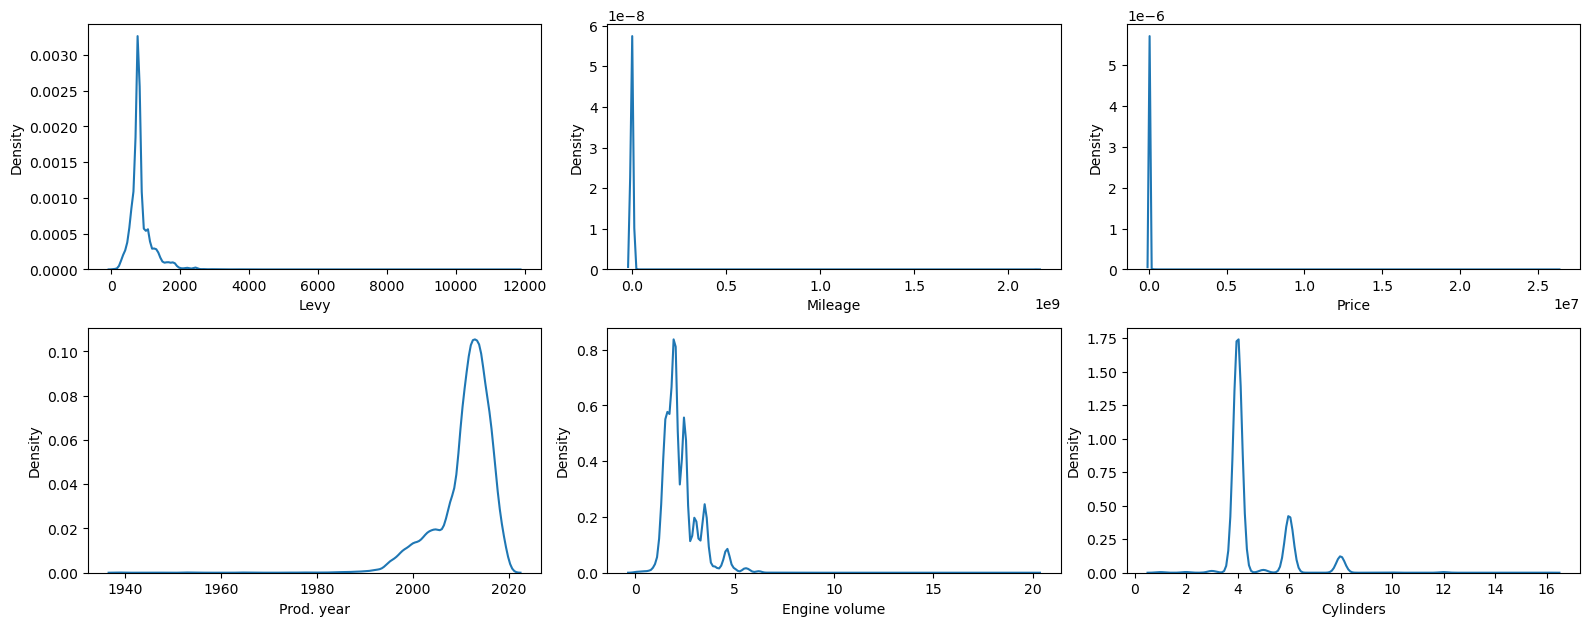

In [66]:
fig = plt.figure(figsize=(16, 12))

for i, cont in enumerate(conti):
    plt.subplot(4, 3, i+1)  
    sns.kdeplot(data=df[cont])

plt.tight_layout()  
plt.show()

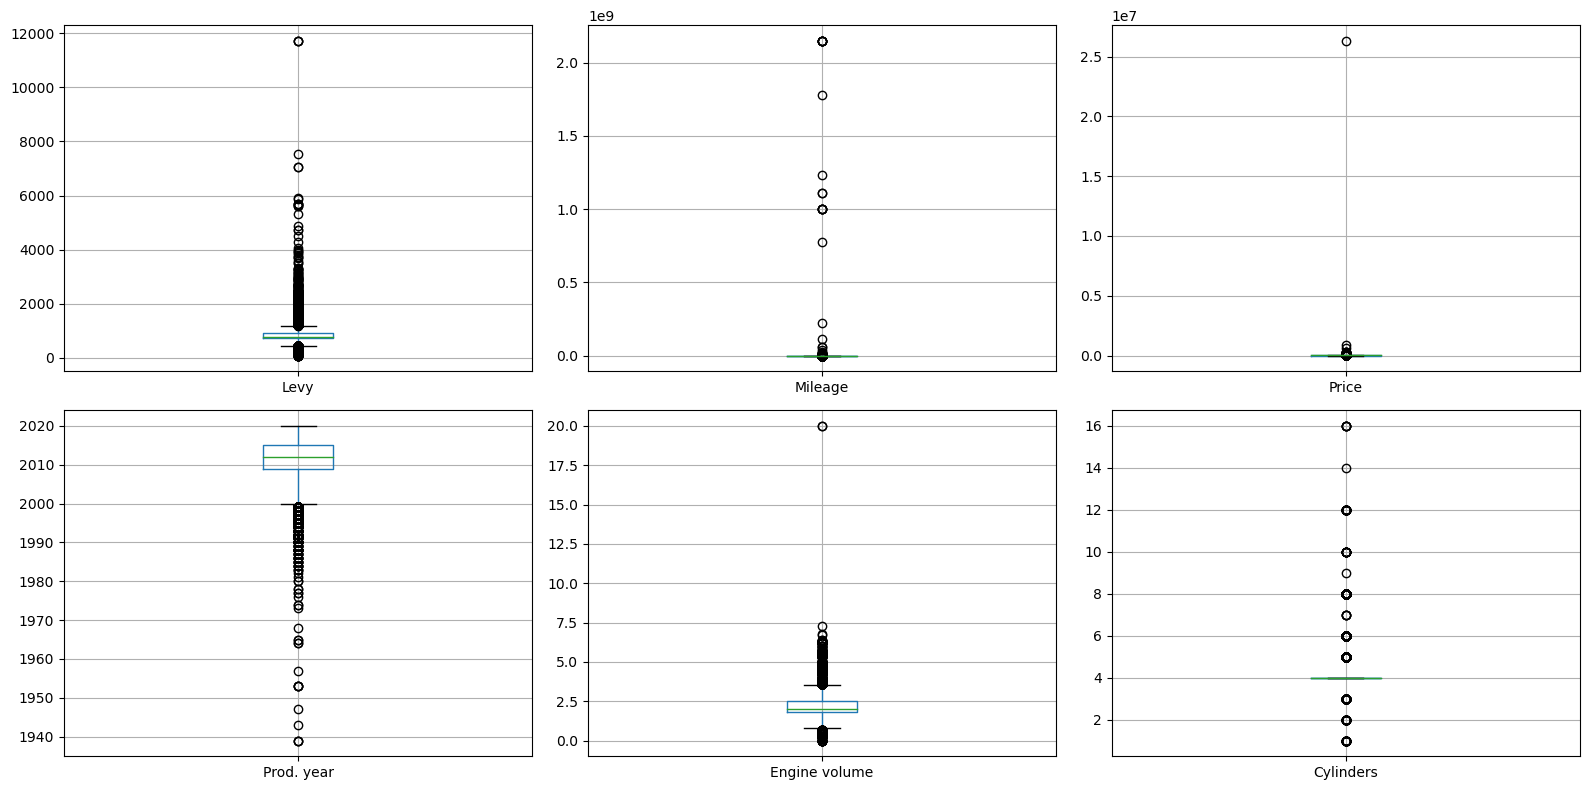

In [67]:
fig = plt.figure(figsize=(16, 8))
for i, cont in enumerate(conti):
    plt.subplot(2, 3, i+1)  
    df.boxplot(column = [cont])
plt.tight_layout()  
plt.show()


<AxesSubplot:>

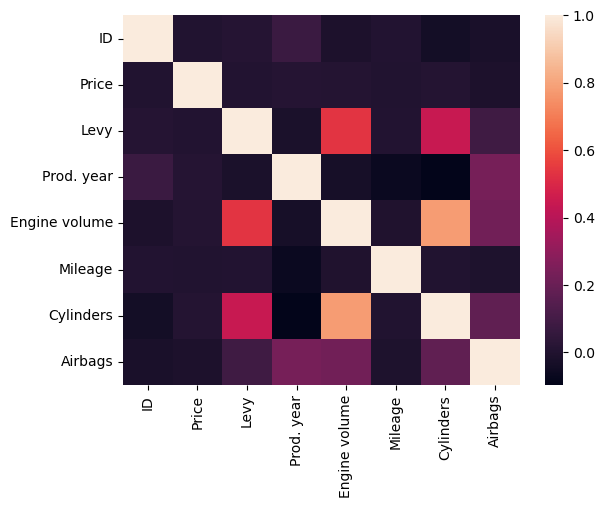

In [68]:
sns.heatmap(df.corr())

There are significant correlations between the Levy variable and the Cylinders, and Engine volume variables. There is also a very high correlation between Cylinders and Engine volume. We'll check later that there are no multicolinearity problems.

## 4. Preprocessing

### 4.1 Remove columns useless

In [69]:
df=df.drop(['Model','ID'],axis=1)

### 4.2 Outliers treatment

In [70]:
for columns in ['Levy','Mileage','Price','Prod. year','Engine volume'] :
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[columns] < lower_bound) | (df[columns] > upper_bound)
    outlier_indices = df[outliers].index

    df = df.drop(outlier_indices)

### 4.3 Standardize variable

In [71]:
var_standardise=['Levy','Mileage','Prod. year','Engine volume','Cylinders']
scaler = StandardScaler()
df[var_standardise] = scaler.fit_transform(df[var_standardise])


## 5. Modeling

### 5.1 Detect multicolinearity

In [20]:
conti2=['Levy','Mileage','Prod. year','Engine volume','Cylinders']

def compute_vif(considered_features):
    
    X = df[considered_features]
    X.loc[:, 'intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

compute_vif(conti2)


C:\Users\andre\AppData\Local\Temp\ipykernel_10844\1500901291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'intercept'] = 1


,Variable,VIF
0,Levy,1.301626
1,Mileage,1.118700
2,Prod. year,1.115298
3,Engine volume,2.066481
4,Cylinders,1.733125


### 5.2 Encoding and train_test_split

In [76]:
category=['Manufacturer','Category','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color','Turbo','Doors']
encoded_df = pd.get_dummies(df, columns=category)

In [77]:
X=encoded_df.drop(['Price'],axis=1)
y=encoded_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.3 Choose model

In [39]:
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb_model = XGBRegressor(max_depth = 6, n_estimators=500, learning_rate =.05)
tree_model = DecisionTreeRegressor()

model_list=[linear_model,random_forest_model,xgb_model,
            tree_model]

In [40]:
liste_r2 = []
liste_rmse = []
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    score=round(r2_score(y_test, y_pred),3)*100
    liste_r2.append(score)
    liste_rmse.append(rmse)
    print(f"For the {type(model).__name__},  RMSE is {rmse} and R2 is {score}%")


For the LinearRegression,  RMSE is 8909.078576826007 and R2 is 37.9%
For the RandomForestRegressor,  RMSE is 6022.146330881146 and R2 is 71.6%
For the XGBRegressor,  RMSE is 5503.1172425635295 and R2 is 76.3%
For the DecisionTreeRegressor,  RMSE is 6864.161482294986 and R2 is 63.1%


In [41]:
list_name=[]
for i in model_list:
    list_name.append(type(i).__name__)
    
df_result = pd.DataFrame({'Model': list_name, 'RMSE': liste_rmse, 'R2' : liste_r2})
df_result.head()

,Model,RMSE,R2
0,LinearRegression,8909.078577,37.9
1,RandomForestRegressor,6022.146331,71.6
2,XGBRegressor,5503.117243,76.3
3,DecisionTreeRegressor,6864.161482,63.1


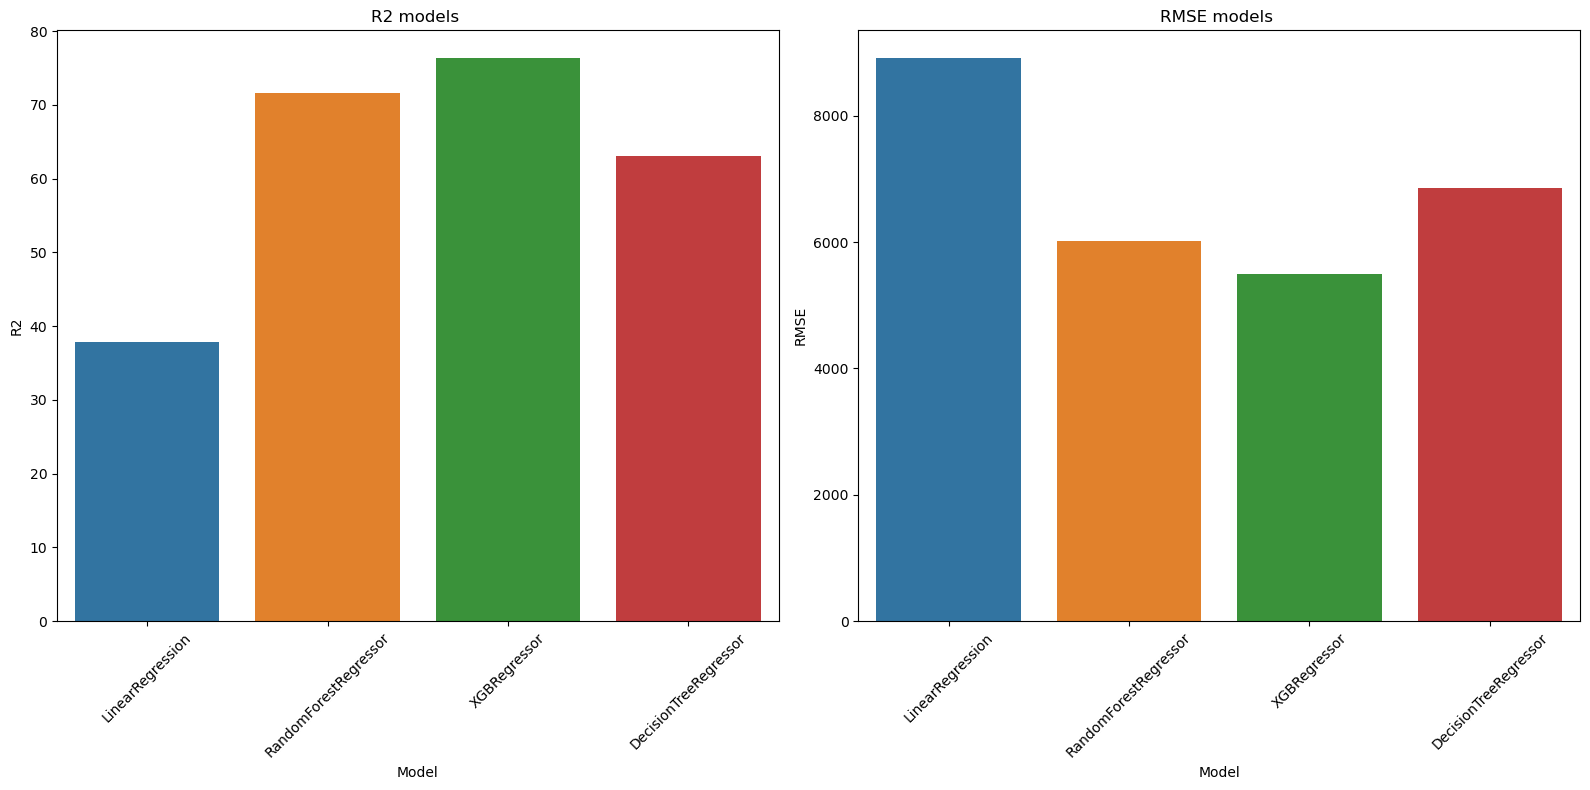

In [45]:
score=['R2','RMSE']
fig = plt.figure(figsize=(16, 8))

for i, m in enumerate(score):
    plt.subplot(1, 2, i+1)  
    sns.barplot(x=df_result['Model'], y=df_result[m])
    plt.xticks(rotation=45)
    plt.title(f"{m} models ")
plt.tight_layout() 
plt.show()


### 5.4 Tuning hyperparameters

In [306]:
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [5, 7, 9],
    'learning_rate': [.1,.05,.01]
}

xgb_model = XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid,
                           scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Lowest RMSE: ", (-grid_search.best_score_)**(1/2.0))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 700}
Lowest RMSE:  5477.957156267963


In [78]:
xgb_final=XGBRegressor(learning_rate=.05, max_depth=9, n_estimators=700)
xgb_final.fit(X_train, y_train)
y_pred = xgb_final.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
score=round(r2_score(y_test, y_pred),3)*100

print(f"  RMSE is {rmse} and R2 is {score}%")

  RMSE is 5407.961276818866 and R2 is 77.10000000000001%


In [79]:
feature_importances=xgb_final.feature_importances_

importance_tuples = [(feature, importance) for feature, importance in zip(X.columns, feature_importances)]

sorted_importances = sorted(importance_tuples, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

Fuel type_Diesel: 0.23484103381633759
Gear box type_Tiptronic: 0.11602512001991272
Manufacturer_SSANGYONG: 0.04150351881980896
Drive wheels_Front: 0.0384129099547863
Turbo_No Turbo: 0.036248303949832916
Category_Sedan: 0.028516964986920357
Prod. year: 0.023185543715953827
Cylinders: 0.022824781015515327
Fuel type_LPG: 0.021811379119753838
Fuel type_Plug-in Hybrid: 0.021636109799146652
Airbags: 0.02022041194140911
Leather interior_No: 0.019086429849267006
Engine volume: 0.015002268366515636
Manufacturer_MERCEDES-BENZ: 0.013758016750216484
Gear box type_Automatic: 0.013064705766737461
Manufacturer_TOYOTA: 0.012859923765063286
Manufacturer_KIA: 0.012613309547305107
Category_Jeep: 0.012576130218803883
Manufacturer_PORSCHE: 0.011675533838570118
Manufacturer_DAEWOO: 0.011523525230586529
Fuel type_Petrol: 0.01151670515537262
Manufacturer_CHEVROLET: 0.010812499560415745
Manufacturer_HONDA: 0.010524000972509384
Wheel_Left wheel: 0.010484155267477036
Doors_+5 doors: 0.009887737222015858
Manufact

## 6. Conclusion